第4章 追跡アルゴリズムの性能保証
==

定理4.1（OMPの最適解保証：二つの直交行列の場合）
--
$\mathbf{\Psi}$,$\mathbf{\Phi}$を$n×n$の直交行列とする．線形連立方程式$\mathbf{Ax}=[\mathbf{\Psi},\mathbf{\Phi}]\mathbf{x}=\mathbf{b}$に対して，もし，解$\mathbf{x}$が存在して、最初の$n$個の要素の中に$k_p$個の非ゼロ要素があり，
$$max(k_p,k_q)<\frac{1}{2\mu(\mathbf{A})}$$
が成り立つならば，しきい値パラメータ$\epsilon_0=0$で実行されるOMPは$k_0=k_p+K_q$回の反復で最適解を与える．

定理4.2（基底追跡の最適解保証：二つの直交行列の場合）
--
$\mathbf{\Psi}$,$\mathbf{\Phi}$を$n×n$の直交行列とする．線形連立方程式$\mathbf{Ax}=[\mathbf{\Psi},\mathbf{\Phi}]\mathbf{x}=\mathbf{b}$に対して，もし，解$\mathbf{x}$が存在して、最初の$n$個の要素の中に$k_p$個の非ゼロ要素があり，
$$2\mu(\mathbf{A})^2k_pk_q+\mu(\mathbf{A})k_p-1<0$$
が成り立つならば，得られた解は$(P_1)$の一意解であり，${P_0}$の一意解でもある．

線形計画問題(LP)
--

BP（基底追跡）の解$\mathbf{x}$より$L_0$ノルムが大きくて$L_1$ノルムが小さい解$\mathbf{y}$の集合

$C = \{\mathbf{y}\,|\,
\mathbf{y}\neq \mathbf{x},\,
\|\mathbf{y}\|_1\leq\|\mathbf{x}\|_1,\,
\|\mathbf{y}\|_0\geq\|\mathbf{x}\|_0,\,
\mathbf{A}(\mathbf{y}-\mathbf{x})=\mathbf{0}\}
$

が与えられた条件

$2\mu(\mathbf{A})^2k_pk_q+\mu(\mathbf{A})k_p-1<0$<br>

もしくはもっと解釈が容易な条件

$\|x\|_0=k_p+k_q<\frac{\sqrt{2}-0.5}{\mu(\mathbf{A})}$

の元で空となることを証明する

In [55]:
from scipy.optimize import linprog

# パラメータ
n, kp, kq, mu = 50, 9, 7, 0.1

one_p = [1.] * kp + [0.] * (n - kp)
one_q = [1.] * kq + [0.] * (n - kq)
C = np.array(one_p + one_q)
A_ub = np.diag([1. - mu] * n + [mu - 1.] * n)
b_ub = np.zeros(2 * n)
A_eq = np.eye(2 * n)
b_eq = np.ones(2 * n)

# 最大化したいので負をとる
C *= -1
A_ub *= -1
b_ub *= -1
A_eq *= -1
b_eq *= -1

linprog(C, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq)

     fun: 50.0
 message: 'Optimization failed. Unable to find a feasible starting point.'
     nit: 100
  status: 2
 success: False
       x: nan

nanだと…解集合が空であることを示したいからこれでいいのか…

定理4.3（OMPの最適解保証）
--
線形連立方程式$\mathbf{Ax}=\mathbf{b}$（$n<m$である$\mathbf{A}\in\mathbb{R}^{n×m}$はフルランクの行列）に対して，もし，解$\mathbf{x}$が存在して，
$$\|\mathbf{x}\|_0<\frac{1}{2}\left(1+\frac{1}{\mu(\mathbf{A})}\right)$$
を満たせば，しきい値パラメータ$\epsilon_0=0$で実行されるOMP(OGA)は最適解を与える．

定理4.4（しきい値アルゴリズムの最適解保証）
--
線形連立方程式$\mathbf{Ax}=\mathbf{b}$（$n<m$である$\mathbf{A}\in\mathbb{R}^{n×m}$はフルランクの行列）に対して，解$\mathbf{x}$が存在して<br>
（その非ゼロ要素の最小値は$|x_{min}|$，最大値は$|x_{max}|$とする）
$$\|\mathbf{x}\|_0<\frac{1}{2}\left(1+\frac{1}{\mu(\mathbf{A})}\frac{|x_{min}|}{|x_{max}|}\right)$$
を満たせば，しきい値パラメータ$\epsilon_0=0$で実行されるしきい値アルゴリズムは最適解を与える．

定理4.5（基底追跡の最適解保証）
--
線形連立方程式$\mathbf{Ax}=\mathbf{b}$（$n<m$である$\mathbf{A}\in\mathbb{R}^{n×m}$はフルランクの行列）に対して，解$\mathbf{x}$が存在して，
$$\|\mathbf{x}\|_0<\frac{1}{2}\left(1+\frac{1}{\mu(\mathbf{A})}\right)$$
を満たせば，得られた解は$(P_1)$の一意解であり，$(P_0)$の一意解でもある．

驚くべきことに，OMPの上界は基底追跡の成功も保証する．ただし，これはいつでも二つのアルゴリズムは似たように振る舞うということではない．実際，二つの直交行列の場合について，これらの二つのアルゴリズムの違いをすでに議論している．一般の場合のこれらのアルゴリズムについての定理は，最悪の場合の振る舞いは，二つのアルゴリズムは同じであり，これらの上界はタイトであることを意味している．

しかし，上記の結果はかなり弱いものである．$n$個の要素のうち非ゼロ要素が$\sqrt{n}$個よりも少ないという，かなりスパースなときにしか成功しない．それほどスパースな状態になる問題はほとんどない．

Troppの厳密性復元条件
==
定義4.1（厳密性復元条件）
--
サポート$S$と行列$\mathbf{A}$が与えられたとき，厳密復元条件（exact recovery condtion; ERC）は次式で与えられる．
$$ERC(A,S):max_{i\notin S}\|\mathbf{A}_{S}^{+}\mathbf{a}_i\|_{1}<1$$

$\mathbf{A}_{S}^{+}$は$\mathbf{A}_{S}$の疑似逆行列

定理4.6（ERCと追跡アルゴリズムの性能）
--
線形連立方程式$\mathbf{Ax}=\mathbf{b}$の解である，サポート$S$を持つスパースなベクトル$\mathbf{x}$に対して，もしERCが満たされれば，OMPとBPは$\mathbf{x}$を求めることに成功する．

この条件は，相互コヒーレンスを用いた追跡アルゴリズムの成功条件よりも強いが，構成的ではない．つまり，サポートが与えられなければ確認することはできないのである．

（参考）Python SciPy: 線形計画問題を解く
--
http://org-technology.com/posts/scipy-linear-programming.html

SciPy では関数 linprog で線形計画問題を解くことができます。

In [56]:
from scipy.optimize import linprog

c = [-3, -2]
A = [[2, 1], [1, 1]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (1, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds))

res

     fun: -10.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.,  0.,  1.])
  status: 0
 success: True
       x: array([ 2.,  2.])

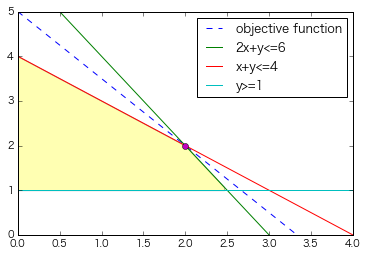

In [57]:
x = np.linspace(0, 4, 100)

y0 = (-3*x+10)/2
y1 = -2*x+6
y2 = -x+4
y3 = np.ones_like(x)

y4 = np.minimum(y1, y2)

plt.figure()
plt.plot(x, y0, "--", label="objective function")
plt.plot(x, y1, label="2x+y<=6")
plt.plot(x, y2, label="x+y<=4")
plt.plot(x, y3, label="y>=1")
plt.plot(res.x[0], res.x[1], "o")
plt.fill_between(x, y3, y4, where=y4>y3, facecolor='yellow', alpha=0.3)
plt.ylim(0, 5)
plt.legend(loc=0)

PuLP で解くと以下のようになります。

In [58]:
import pulp

x = pulp.LpVariable("x")
y = pulp.LpVariable("y")
problem = pulp.LpProblem("A simple maximization objective", pulp.LpMaximize)
problem += 3*x + 2*y, "The objective function"
problem += 2*x + y <= 6, "1st constraint"
problem += x + y <= 4, "2nd constraint"
problem += y >= 1, "3rd constraint"
problem.solve()

[x.value(), y.value()]

[2.0, 2.0]